# **`*` Part - 1  Decision Tree Classifier Implementation `*`**


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
from sklearn.datasets import load_iris
iris=load_iris()
dir(iris)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [ ]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [ ]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [ ]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [ ]:
import seaborn as sns
df=sns.load_dataset('iris')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [ ]:
#Independent and Dependent Features
X = df.iloc[:, :-1]
y = iris.target

In [ ]:
X, y

(     sepal_length  sepal_width  petal_length  petal_width
 0             5.1          3.5           1.4          0.2
 1             4.9          3.0           1.4          0.2
 2             4.7          3.2           1.3          0.2
 3             4.6          3.1           1.5          0.2
 4             5.0          3.6           1.4          0.2
 ..            ...          ...           ...          ...
 145           6.7          3.0           5.2          2.3
 146           6.3          2.5           5.0          1.9
 147           6.5          3.0           5.2          2.0
 148           6.2          3.4           5.4          2.3
 149           5.9          3.0           5.1          1.8
 
 [150 rows x 4 columns],
 array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [ ]:
len(X_train), len(X_test), X.shape

(100, 50, (150, 4))

In [ ]:
X_train.head()

,sepal_length,sepal_width,petal_length,petal_width
96,5.7,2.9,4.2,1.3
105,7.6,3.0,6.6,2.1
66,5.6,3.0,4.5,1.5
0,5.1,3.5,1.4,0.2
122,7.7,2.8,6.7,2.0


# **`Post_Pruning`**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
treemodel = DecisionTreeClassifier(max_depth=2)
treemodel.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2)

In [ ]:
pd.Series(y_train).value_counts()

,count
1,35
2,34
0,31


[Text(0.4, 0.8333333333333334, 'x[3] <= 0.8\ngini = 0.666\nsamples = 100\nvalue = [31, 35, 34]'),
 Text(0.2, 0.5, 'gini = 0.0\nsamples = 31\nvalue = [31, 0, 0]'),
 Text(0.30000000000000004, 0.6666666666666667, 'True  '),
 Text(0.6, 0.5, 'x[3] <= 1.75\ngini = 0.5\nsamples = 69\nvalue = [0, 35, 34]'),
 Text(0.5, 0.6666666666666667, '  False'),
 Text(0.4, 0.16666666666666666, 'gini = 0.188\nsamples = 38\nvalue = [0, 34, 4]'),
 Text(0.8, 0.16666666666666666, 'gini = 0.062\nsamples = 31\nvalue = [0, 1, 30]')]

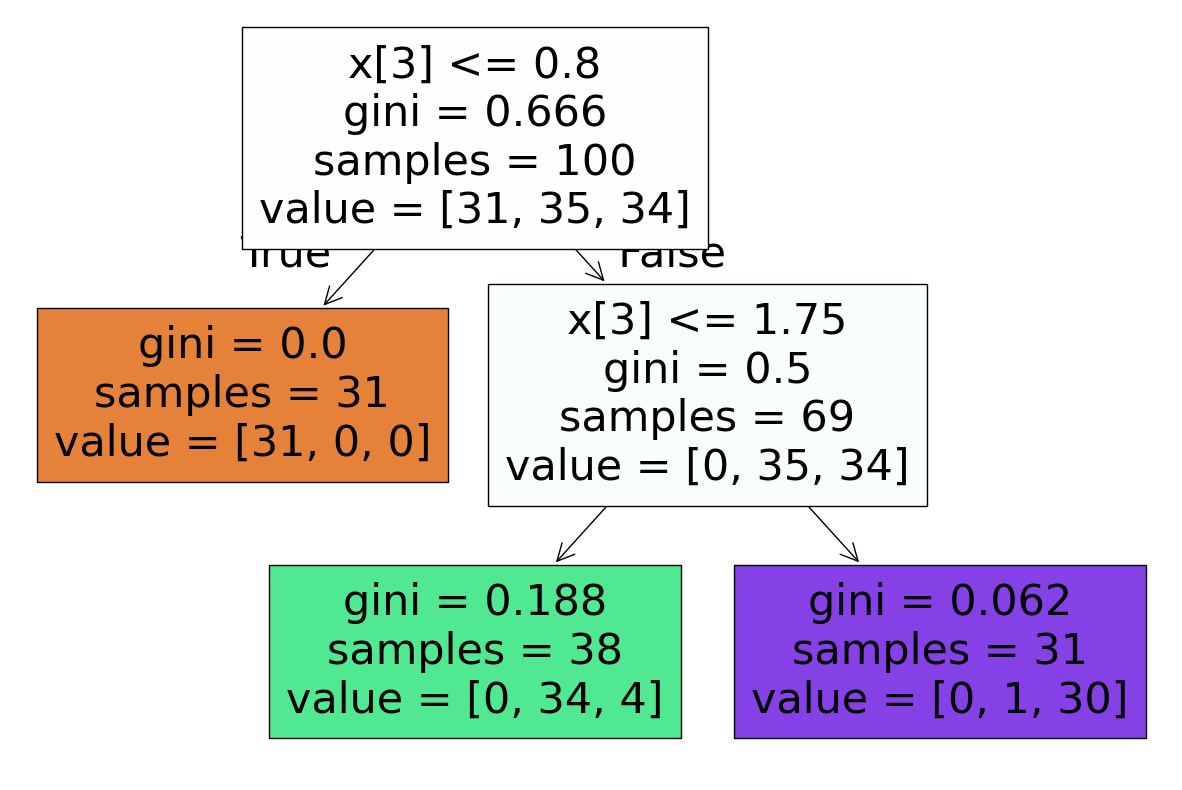

In [ ]:
from sklearn import tree
plt.figure(figsize=(15,10))
tree.plot_tree(treemodel, filled=True)

In [ ]:
#prediction
y_pred = treemodel.predict(X_test)
y_pred

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0, 0, 0, 2, 1, 1, 0,
       0, 1, 1, 2, 1, 2])

In [ ]:
from sklearn.metrics import accuracy_score, classification_report
print(" Accuracy Score : ", accuracy_score(y_test, y_pred))
print("\n Classificatin Report : \n ", classification_report(y_test, y_pred, target_names=iris.target_names))

 Accuracy Score :  0.98

 Classificatin Report : 
                precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       0.94      1.00      0.97        15
   virginica       1.00      0.94      0.97        16

    accuracy                           0.98        50
   macro avg       0.98      0.98      0.98        50
weighted avg       0.98      0.98      0.98        50



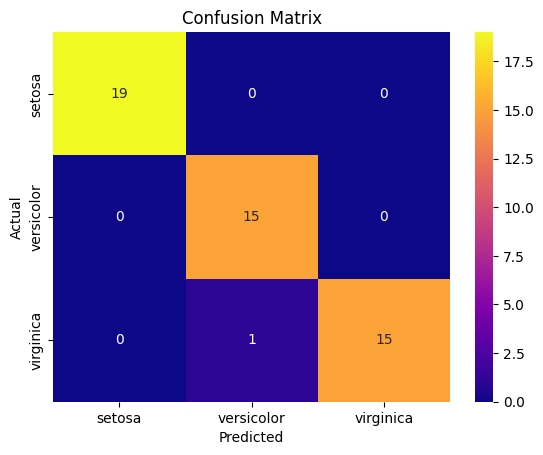

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, cmap='plasma', fmt='g', xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# ***Pre_Prunning***

In [ ]:
parameter = {
    'criterion': ['gini', 'entropy', 'log_loss'],
    'splitter': ['best', 'random'],
    'max_depth': [1, 2, 3, 4, 5],
    'max_features':['auto', 'sqrt', 'log2']
}

In [ ]:
from sklearn.model_selection import GridSearchCV
model=DecisionTreeClassifier()
cv = GridSearchCV(model, parameter, cv=5, scoring='accuracy')
cv.fit(X_train, y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
150 fits failed out of a total of 450.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
150 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.12/dist-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.12/dist-packages/sklearn/base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.12/dist-packages/sklearn/util

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [1, 2, 3, 4, 5],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']},
             scoring='accuracy')

In [ ]:
cv.best_params_

{'criterion': 'log_loss',
 'max_depth': 5,
 'max_features': 'sqrt',
 'splitter': 'random'}

In [ ]:
cv_pred = cv.predict(X_test)

In [ ]:
print(" Accuracy Score : ", accuracy_score(y_test, cv_pred))
print("\n Classificatin Report : \n ", classification_report(y_test, cv_pred, target_names=iris.target_names))

 Accuracy Score :  0.94

 Classificatin Report : 
                precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       0.93      0.87      0.90        15
   virginica       0.88      0.94      0.91        16

    accuracy                           0.94        50
   macro avg       0.94      0.93      0.94        50
weighted avg       0.94      0.94      0.94        50



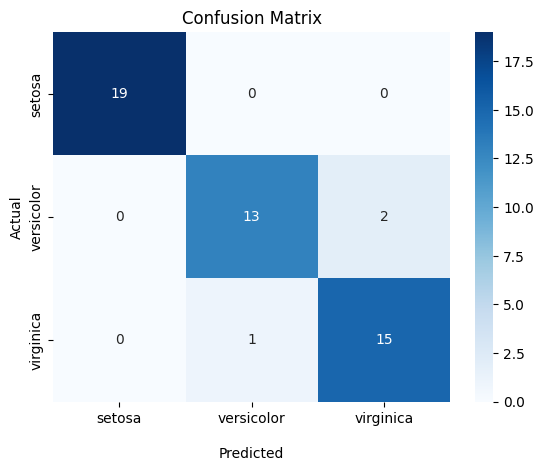

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, cv_pred)
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.xlabel("\nPredicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# ***Part - 2 Decision Tree Regressor Implementation***

In [ ]:
#Load Dataset
import pandas as pd
from sklearn.datasets import fetch_california_housing
house = fetch_california_housing(as_frame=True)

In [ ]:
house

{'data':        MedInc  HouseAge  AveRooms  ...  AveOccup  Latitude  Longitude
 0      8.3252      41.0  6.984127  ...  2.555556     37.88    -122.23
 1      8.3014      21.0  6.238137  ...  2.109842     37.86    -122.22
 2      7.2574      52.0  8.288136  ...  2.802260     37.85    -122.24
 3      5.6431      52.0  5.817352  ...  2.547945     37.85    -122.25
 4      3.8462      52.0  6.281853  ...  2.181467     37.85    -122.25
 ...       ...       ...       ...  ...       ...       ...        ...
 20635  1.5603      25.0  5.045455  ...  2.560606     39.48    -121.09
 20636  2.5568      18.0  6.114035  ...  3.122807     39.49    -121.21
 20637  1.7000      17.0  5.205543  ...  2.325635     39.43    -121.22
 20638  1.8672      18.0  5.329513  ...  2.123209     39.43    -121.32
 20639  2.3886      16.0  5.254717  ...  2.616981     39.37    -121.24
 
 [20640 rows x 8 columns],
 'target': 0        4.526
 1        3.585
 2        3.521
 3        3.413
 4        3.422
          ...  
 2063

In [ ]:
dir(house)

['DESCR', 'data', 'feature_names', 'frame', 'target', 'target_names']

In [ ]:
house.feature_names

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

In [ ]:
house.target_names

['MedHouseVal']

In [ ]:
df = house.frame
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [ ]:
df.shape

(20640, 9)

In [ ]:
X = df.drop('MedHouseVal', axis=1)
y = df['MedHouseVal']

In [ ]:
# Split dataset into 80% training, 20% testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ***Pre_Prunning***

In [ ]:
#Build Decision Tree Regressor with Pre Prunning
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(max_depth=5, min_samples_split=10, min_samples_leaf=5, random_state=42)
regressor.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=5, min_samples_leaf=5, min_samples_split=10,
                      random_state=42)

In [ ]:
#predict the test data
y_pred = regressor.predict(X_test)

In [ ]:
#Evaluate model  #Lower MSE = Better model,  R2 close to 1 = Good fit
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
print("R2 Score ", r2_score(y_test, y_pred))
print("\nMean Squared Error", mean_squared_error(y_test,y_pred))
print("\nMean Absolute Error", mean_absolute_error(y_test,y_pred))

R2 Score  0.5997321244428706

Mean Squared Error 0.5245146178314735

Mean Absolute Error 0.5222592972077786


[Text(0.5, 0.9166666666666666, 'MedInc <= 5.086\nsquared_error = 1.337\nsamples = 16512\nvalue = 2.072'),
 Text(0.25, 0.75, 'MedInc <= 3.074\nsquared_error = 0.834\nsamples = 13101\nvalue = 1.74'),
 Text(0.375, 0.8333333333333333, 'True  '),
 Text(0.125, 0.5833333333333334, 'AveRooms <= 4.314\nsquared_error = 0.561\nsamples = 6268\nvalue = 1.358'),
 Text(0.0625, 0.4166666666666667, 'MedInc <= 2.215\nsquared_error = 0.679\nsamples = 2624\nvalue = 1.626'),
 Text(0.03125, 0.25, 'AveRooms <= 3.422\nsquared_error = 0.575\nsamples = 1404\nvalue = 1.377'),
 Text(0.015625, 0.08333333333333333, 'squared_error = 0.832\nsamples = 482\nvalue = 1.775'),
 Text(0.046875, 0.08333333333333333, 'squared_error = 0.314\nsamples = 922\nvalue = 1.169'),
 Text(0.09375, 0.25, 'AveOccup <= 2.487\nsquared_error = 0.646\nsamples = 1220\nvalue = 1.913'),
 Text(0.078125, 0.08333333333333333, 'squared_error = 0.911\nsamples = 436\nvalue = 2.331'),
 Text(0.109375, 0.08333333333333333, 'squared_error = 0.348\nsamples

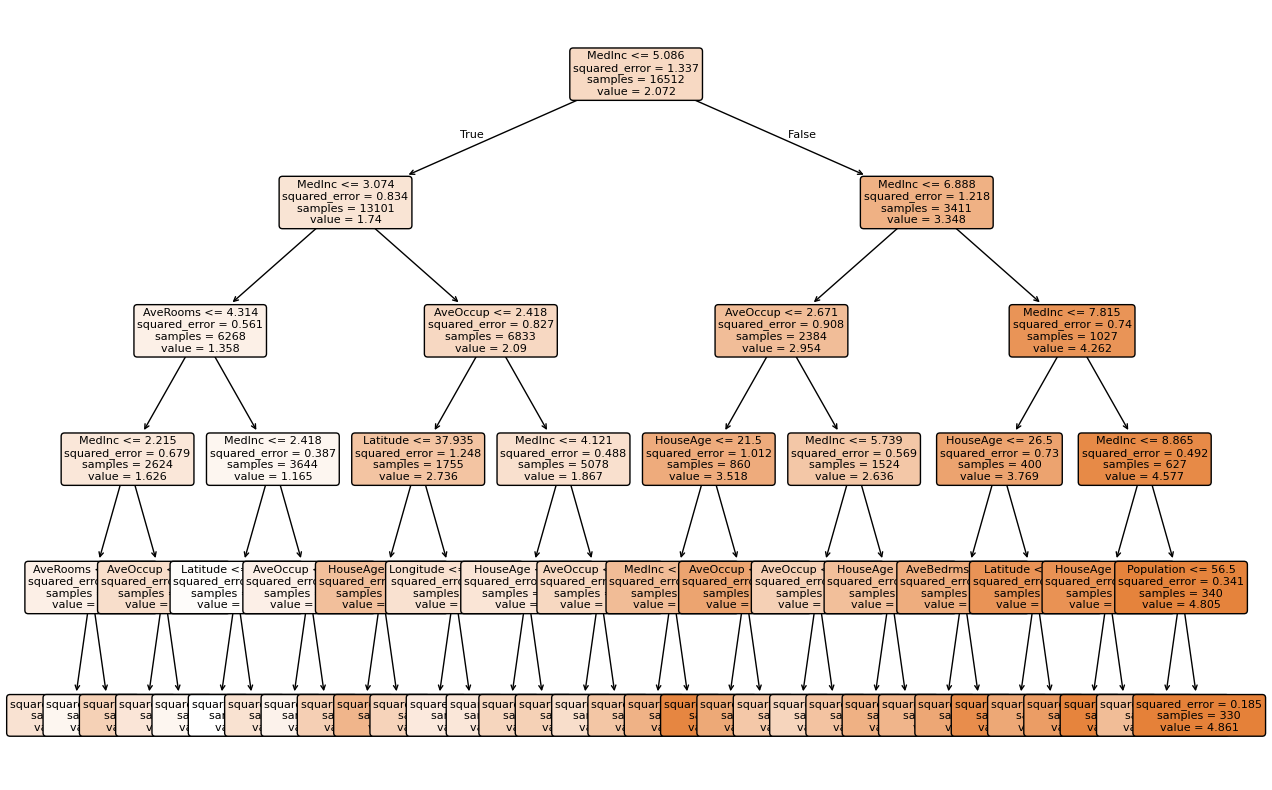

In [ ]:
#Visualize the Decision Tree
import matplotlib.pyplot as plt
from sklearn import tree
plt.figure(figsize=(15,10))
tree.plot_tree(regressor, filled=True, feature_names=X.columns, fontsize=8, rounded=True)

<Axes: >

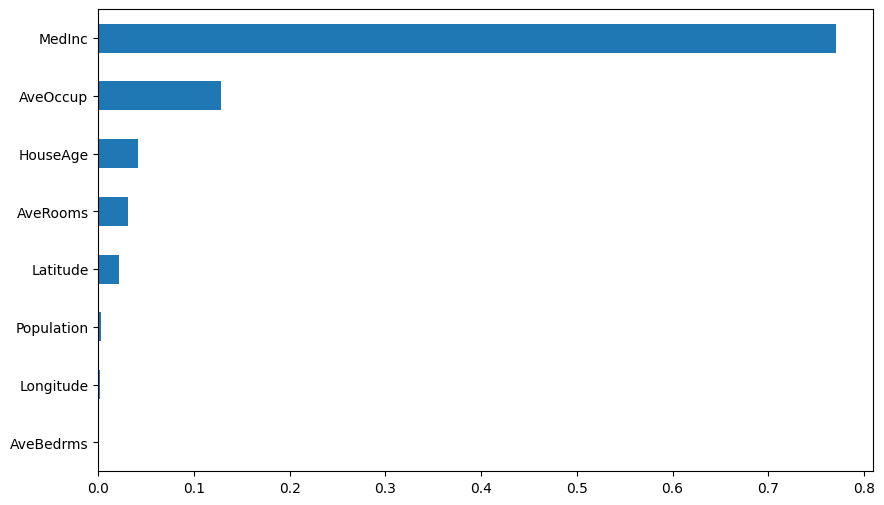

In [ ]:
#visualize which features most influence the prediction.
feature_importances = pd.Series(regressor.feature_importances_, index=X.columns)
feature_importances.sort_values(ascending=True).plot(kind='barh',figsize=(10,6))